enter keyword/hashtag to search about :rohit sharma
enter how many tweets to analyze: 30
RT @CricCrazyJohns: Suryakumar Yadav (in Cricbuzz) said "Rohit Sharma as a captain is very clear in his mind about the changes he wants to…
Sentiment(polarity=0.16500000000000004, subjectivity=0.29916666666666664)
Suryakumar Yadav can bat at No.3 since Virat Kohli-Rohit Sharma are going to open in T20 WC: Sanjay Manjrekar https://t.co/93waGxhrif
Sentiment(polarity=0.0, subjectivity=0.5)
RT @CricCrazyJohns: Suryakumar Yadav (in Cricbuzz) said "Rohit Sharma as a captain is very clear in his mind about the changes he wants to…
Sentiment(polarity=0.16500000000000004, subjectivity=0.29916666666666664)
RT @india_fantasy: Most International Runs in the last 5 years 

Virat Kohli 11028 @ 63.01 🤯
Joe Root 8886 @ 49.09 
Babar Azam 7637 @ 49.91…
Sentiment(polarity=0.16666666666666666, subjectivity=0.18888888888888888)
Suryakumar Yadav (in Cricbuzz) said "Rohit Sharma as a captain is very clear in his mind abo

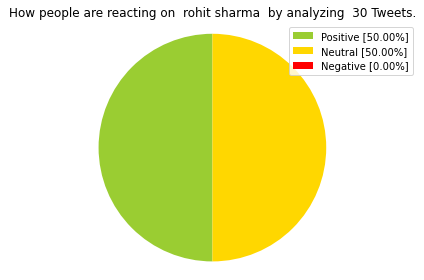

In [9]:
import tweepy
from textblob import TextBlob
import matplotlib.pyplot as plt


def percentage(part, whole):
    return 100 * float(part)/float(whole)

consumer_key = 'BigiIXG8iCwJ0UsZboDFJNf93'
consumer_secret = '45NVhGuCg8b2OtKvGtPgyCkNr1Z3IT3zvqC3ofhi9Lcw5SgxsQ'
access_token = '1191625545911558144-IEHy19UBWPn1YfqIyNwzEUWQ53FbbH'
access_token_secret = 'xOP3hxY7Ks2g6VYTJ4mEhNbxzgo0ixkjjQ9HEXco3oED2'
auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)
#public_tweets = api.search('Dhoni')
search_term = input("enter keyword/hashtag to search about :")
noOfSearchTerms = int(input("enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search, q=search_term).items(noOfSearchTerms)


positive = 0
negative = 0
neutral = 0
polarity = 0



for tweet in tweets:
    print(tweet.text)
    analysis = TextBlob(tweet.text)
    print(analysis.sentiment)
    
    polarity += analysis.sentiment.polarity
    
    
    if(analysis.sentiment.polarity == 0):
        neutral += 1
    elif(analysis.sentiment.polarity < 0.00):
        negative += 1
    elif(analysis.sentiment.polarity > 0):
        positive += 1
        
        
positive = percentage(positive, noOfSearchTerms)
negative = percentage(negative, noOfSearchTerms)
neutral = percentage(neutral, noOfSearchTerms)


positive = format(positive, '.2f')
negative = format(negative, '.2f')
neutral = format(neutral, '.2f')



print("How people are reacting on "   +   search_term  +   " by analyzing "   +   str(noOfSearchTerms)   +   " weets.")

if (polarity == 0):
    print("neutral")
if (polarity < 0):
    print("negative")
if (polarity > 0):
    print("positive")
    
    
    
labels = ['Positive ['+str(positive)+'%]','Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']

sizes = [positive, neutral, negative]
colors = ['yellowgreen','gold','red']
patches, texts = plt.pie(sizes, colors=colors,startangle=90)
plt.legend(patches,labels,loc="best")
plt.title("How people are reacting on  "   +   search_term  +   "  by analyzing  "   +   str(noOfSearchTerms)   +   " Tweets.")
plt.axis('equal')
plt.tight_layout()
plt.show()


In [3]:
import sys,tweepy